## Analyzing the Difference between the two highest eigenvalues of the "Adjacency Matrix of Band Random Graphs"


We first start off by creating a random band matrix with width "W"

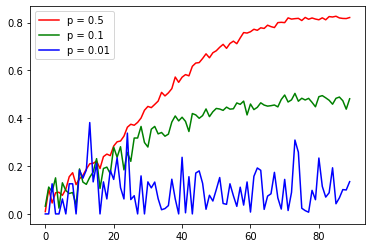

In [43]:
# standard imports 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.widgets import Slider, Button
from ipywidgets import *
import time
import random

# creating a random band matrix of size n*n where n is given as input
# the band width will be given by w, M(i,j) = 0 if i-j > w or i-j < -w
def random_band_matrix(n, w, p):
    M = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            if i-j >= w or i-j <= -w:
                M[i,j] = 0
            else:
                # choose 1 with probablity p and 0 with probablity (1-p)
                if random.random() < p: # choose a random number within [0,1) and if it is less than p, then set matrix entry to 1, else set to 0
                    M[i,j] = 1
                else:
                    M[i,j] = 0
                # M[i,j] = w
    # making the matrix symmetric by and setting the diagonal elements to zero 
    for i in range(n):
        for j in range(n):
            if i > j:
                M[j,i] = M[i,j] 
            if i == j:
                M[i,j] = 0
    return M


You can test out the Random Band Matrix Generator as well by running the cell below

In [45]:
random_band_matrix(10,2,0.5)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])

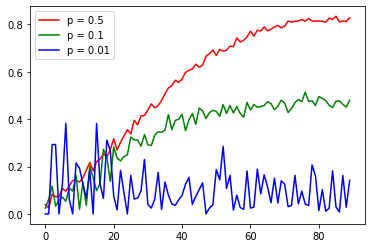

In [47]:



# find the highest and second highest eigenvalue of the matrix M
def find_gap(M):
    eigenvalues = np.linalg.eigvals(M) # finding the eigenvalues of the matrix M
    eigenvalues.sort() # sorting the eigenvalues in ascending order
    e1=eigenvalues[-1] # highest eigenvalue
    e2=eigenvalues[-2] # second highest eigenvalue
    return 1-e2/e1

# take n = 1000 and vary w from 10 to n and store the value of 1-e2/e1 in a list and then plot it vs w
def plot_gap(n):
    w_list_1 = [] # will use p = 0.5
    w_list_2 = [] # will use p = 0.1
    w_list_3 = [] # will use p = 0.01
    for w in range(10,n):
        M = random_band_matrix(n, w, 0.5)
        w_list_1.append(find_gap(M))
    for w in range(10,n):
        M = random_band_matrix(n, w, 0.1)
        w_list_2.append(find_gap(M))
    for w in range(10,n):
        M = random_band_matrix(n, w, 0.01)
        w_list_3.append(find_gap(M))
    
    # plot all of them on the same graph 
    plt.plot(w_list_1,color='r',label='p = 0.5')
    plt.plot(w_list_2,color='g',label='p = 0.1')
    plt.plot(w_list_3,color='b',label='p = 0.01')
    plt.legend()
    plt.show()

plot_gap(100)







